Topic:        Challenge Set 5  
Subject:      Practice Linear Regression  
Date:         10/15/2018  
Name:         Emma Huang  

# Challenge 1

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [1]:
import pandas as pd
import numpy as np

import math

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import patsy
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('2013_movies.csv')
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])

In [3]:
df['constant'] = 1000

In [4]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,constant
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22,1000
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03,1000
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22,1000
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03,1000
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14,1000


In [5]:
m = LinearRegression()
m.fit(df.loc[:,['constant']],df['DomesticTotalGross'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
m.coef_, m.intercept_

(array([0.]), 100596875.22)

In [7]:
preds = m.predict(df.loc[:,['constant']])

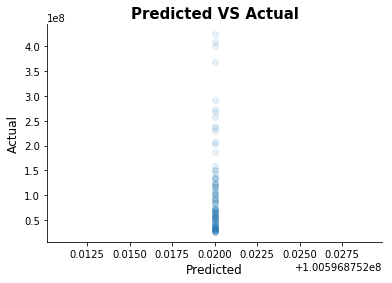

In [8]:
plt.scatter(preds,df['DomesticTotalGross'],alpha=.1)
plt.title('Predicted VS Actual', fontsize = 15, weight = 'bold')
plt.ylabel('Actual', fontsize = 12)
plt.xlabel('Predicted', fontsize = 12)
sns.despine()

In [9]:
residuals = df['DomesticTotalGross']-preds

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


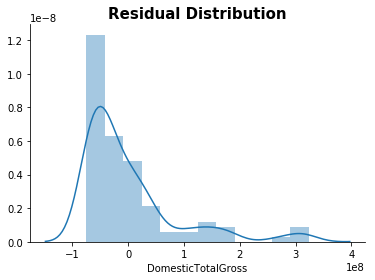

In [10]:
sns.distplot(residuals)
plt.title('Residual Distribution', fontsize = 15, weight = 'bold')
sns.despine()

This model will only predict one number, the one that minimizes the residuals between the constant and each value in the domestic total gross column. The residuals are highly skewed due to this, as the larger or smaller values in the data set will be greatly over or underestimated.

# Challenge 2

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [11]:
df.dropna(subset=['Budget'], inplace=True)

In [12]:
m.fit(df.loc[:,['constant','Budget']],df['DomesticTotalGross'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
preds = m.predict(df.loc[:,['constant','Budget']])

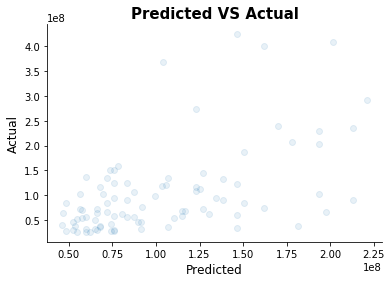

In [14]:
plt.scatter(preds,df['DomesticTotalGross'],alpha=.1)
plt.title('Predicted VS Actual', fontsize = 15, weight = 'bold')
plt.ylabel('Actual', fontsize = 12)
plt.xlabel('Predicted', fontsize = 12)
sns.despine()

In [15]:
residuals = df['DomesticTotalGross']-preds

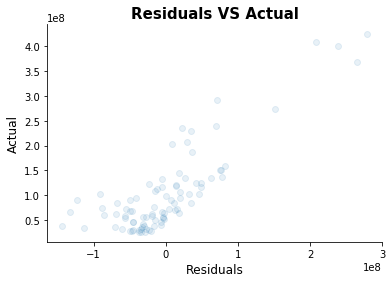

In [16]:
plt.scatter(residuals,df['DomesticTotalGross'],alpha=.1)
plt.title('Residuals VS Actual', fontsize = 15, weight = 'bold')
plt.ylabel('Actual', fontsize = 12)
plt.xlabel('Residuals', fontsize = 12)
sns.despine()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


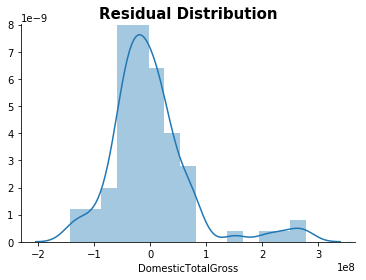

In [17]:
sns.distplot(residuals)
plt.title('Residual Distribution', fontsize = 15, weight = 'bold')
sns.despine()

This prediction is much more acturate. The residuals are more normally distributed and the predicted values don't seem too far off from the actual values in general. Adding a non-static variable gave the model more variation to predict with.

# Challenge 3  
Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

In [18]:
dummy = pd.get_dummies(df['Rating'])
df = pd.concat([df.reset_index(drop=True),
                 dummy.reset_index(drop=True),
                ], axis= 1)

In [19]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,constant,PG,PG-13,R
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22,1000,0,1,0
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03,1000,0,1,0
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22,1000,1,0,0
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03,1000,1,0,0
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14,1000,0,1,0


In [20]:
m.fit(df.loc[:,['constant','PG','PG-13','R']],df['DomesticTotalGross'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
preds = m.predict(df.loc[:,['constant','PG','PG-13','R']])

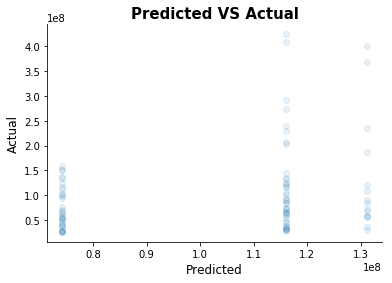

In [22]:
plt.scatter(preds,df['DomesticTotalGross'],alpha=.1)
plt.title('Predicted VS Actual', fontsize = 15, weight = 'bold')
plt.ylabel('Actual', fontsize = 12)
plt.xlabel('Predicted', fontsize = 12)
sns.despine()

In [23]:
residuals = df['DomesticTotalGross']-preds

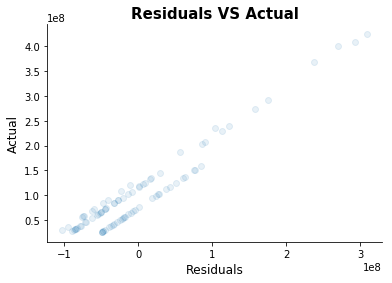

In [24]:
plt.scatter(residuals,df['DomesticTotalGross'],alpha=.1)
plt.title('Residuals VS Actual', fontsize = 15, weight = 'bold')
plt.ylabel('Actual', fontsize = 12)
plt.xlabel('Residuals', fontsize = 12)
sns.despine()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


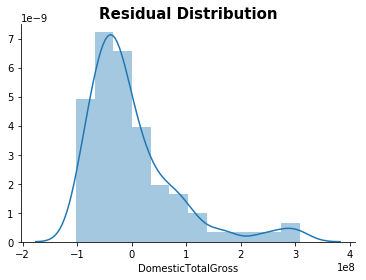

In [25]:
sns.distplot(residuals)
plt.title('Residual Distribution', fontsize = 15, weight = 'bold')
sns.despine()

Here the residuals are skewed again. Each predicted point can only be multiplied by 3 coefficients, but there's much more range than that in the actual values, so each catergory will under or over predict at the extremes.

# Challenge 4
Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

In [26]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,constant,PG,PG-13,R
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22,1000,0,1,0
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03,1000,0,1,0
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22,1000,1,0,0
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03,1000,1,0,0
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14,1000,0,1,0


In [27]:
df['budget2'] = df['Budget']**2

In [28]:
def to_root(item):
    return math.sqrt(item)

df['time_log'] = df['Runtime'].apply(to_root)

In [29]:
m.fit(df.loc[:,['Budget','time_log','PG','PG-13','R']],df['DomesticTotalGross'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
preds = m.predict(df.loc[:,['Budget','time_log','PG','PG-13','R']])

In [31]:
np.sqrt(np.mean((preds - df['DomesticTotalGross'])**2))

72441497.57037675

In [32]:
m.score(df.loc[:,['Budget','time_log','PG','PG-13','R']],df['DomesticTotalGross'])

0.30207745288861687

In [33]:
residuals = df['DomesticTotalGross']-preds

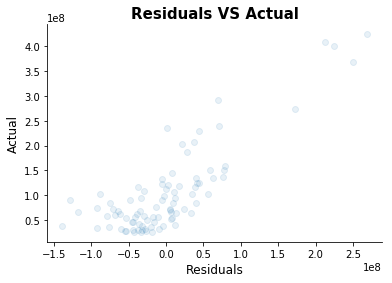

In [34]:
plt.scatter(residuals,df['DomesticTotalGross'],alpha=.1)
plt.title('Residuals VS Actual', fontsize = 15, weight = 'bold')
plt.ylabel('Actual', fontsize = 12)
plt.xlabel('Residuals', fontsize = 12)
sns.despine()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


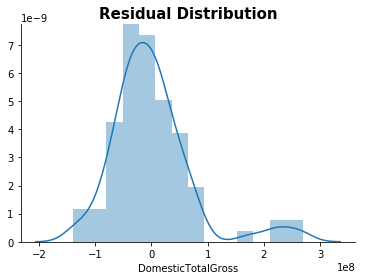

In [35]:
sns.distplot(residuals)
plt.title('Residual Distribution', fontsize = 15, weight = 'bold')
sns.despine()

# Challenge 5

Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

In [36]:
X=df.loc[:,['Budget','time_log','PG','PG-13','R']]

y=df['DomesticTotalGross']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

In [38]:
m.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
m.score(X_train,y_train)

0.27177308449846405

In [40]:
m.score(X_test,y_test)

0.33218664979886947

In [41]:
preds = m.predict(X_test)

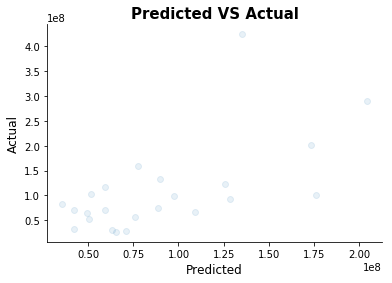

In [42]:
plt.scatter(preds,y_test,alpha=.1)
plt.title('Predicted VS Actual', fontsize = 15, weight = 'bold')
plt.ylabel('Actual', fontsize = 12)
plt.xlabel('Predicted', fontsize = 12)
sns.despine()

In this case, the test r squared is better than the training. This is probably due to the small size of the data set.